# Program Evaluation and Review Technique

The __Program Evaluation and Review Technique (PERT)__ is a statistical tool used in project management, which was designed to analyze and represent the task involved in a given project.

"PERT" was developed primarily to simplify the planning and scheduling of large and complex projects. It was developed for the U.S. Navy Special Projects Office in 1957 to support the U.S. Navy's Polaris nuclear submarine project.

## UGM-27 Polaris

The UGM-27 Polaris missile was a two-stage solid-fueled nuclear-armed submarine-launched ballistic missile. The United States Navy's first SLBM, it served from 1961 to 1996.

<img src='files/img/polaris.jpg'>

The Polaris Missile Project is one of the most complex, dangerous and ambitious program managed by man. At that time no long-range missile was launched from a submarine with a great accuracy. It was so accurate and precise that the UK ended up adopting it as well.

It was a complex and large-scale project that the US Navy had to cooperate with various sectors such as the academia, industry and research firms scattered all over the country. More than 3000 contractors were recruited to complete this huge project.

Due to the high stakes and the technical challenges involved, The Special Projects Office of the US Department of Defense along with the US Navy came up with a new and efficient system to schedule project tasks, the Program Evaluation Review Technique (PERT), to replace the simpler Gantt chart methodology.

## Overview

PERT is a method of analyzing the tasks involved in completing a given project, especially the time needed to complete each task, and to identify the minimum time needed to complete the total project. It incorporates uncertainty by making it possible to schedule a project while not knowing precisely the details and durations of all the activities. It is more of an event-oriented technique rather than start-and-completion-oriented, and is used more in these projects where time is the major factor rather than cost. It is applied on very large-scale, one-time, complex, non-routine infrastructure and on Research and Development projects.

### Dependency Network

A project can be modeled as a __Directed Acyclic Graph__ where nodes represent tasks and edges represent the relationships between the tasks. Suppose there are 2 tasks, Task A and Task B, and Task A has to be completed first before you can start Task B. We can model this as a graph with 2 nodes, node A and B, and an edge from A to B.

<img src='files/img/AB.png'>

An arrow from A to B means that node A has to be completed first before node B. Given this constraint, we can see how having cycles in our graph can be problematic.

<img src='files/img/ABC.png'>

Task B has to be completed before Task C, and Task A has to be completed before Task B, but Task C has to be completed before Task A. Thus, this is not a feasible graph because we can never find a task that we should complete first. This is the reason why we use a directed acyclic graph.

### Time Estimates

PERT attempts to address timescale uncertainty in projects by using three different probabilistic time estimates for each project component:

-  _Optimistic Time_: The minimum possible time required to accomplish an activity ($o$) or a path ($O$), assuming everything proceeds better than is normally expected.
-  _Pessimistic Time_: The maximum possible time required to accomplish an activity ($p$) or a path ($P$), assuming everything goes wrong (but excluding major catastrophe).
-  _Most Likely Time_: The best estimate of the time required to accomplish an activity ($m$) or a path ($M$), assuming everything proceeds as normal.

These three probabilistic time estimates are then combined into an __Expected Time__ which is the best estimate of the time required to accomplish an activity ($te$) or a path ($TE$), accounting for the fact that things don't always proceed as normal. It is the average time the task would require if the task were repeated on a number of occasions over an extended period of time.

The Expected Time of an activity (te) is calculated using the formula,

$$te = \frac{o + 4m + p}{6}$$

where, $o$ is the Optimistic Time of an activity, $m$ is the Most Likely Time of an activity and $p$ is the Pessimistic Time of an activity.

The Expected Time of a path ($TE$) is simply the sum of the Expected Time of activities in the path ($te$).

$$TE = \sum_{i = 1}^n te_i$$

This formula is found by using curve-fitting.

<img src='files/img/OMP.png'>

Note that the __Most Likely__ time represents the peak of the curve. The __Optimistic__ and __Pessimistic__ time are out along the baseline at opposite ends of the probability distribution. The __Expected__ time is the time which divides the total area under the curve in two halves, which means that it has a __50/50__ probability of being achieved. As you can see this is a __very rough estimate__.

As you may imagine, if you have some historical data about the time required to accomplish an activity, then you may use __Exponentially Weighted Moving Average (EWMA)__ or some kind of __Machine Learning__ algorithm to get a better estimate of the duration. Unfortunately, for projects that have never been done before, this is not always available so a little bit of guess work is unavoidable.

Another way to obtain a better time estimate is that, if you know the sequence of events that are going to happen and the transition probabilities between those events, then you can use the __Event Chain Methodology__, which is essentially just running a __Markov Chain Monte Carlo__ simulation. The problem is that for projects with hundred or thousands of activities, this can be a very complicated and time-consuming process requiring massive amounts of computing power. This method also doesn't address the problem of dependencies.

Bear in mind that the coefficients for the formula __are not set in stone__. Based on expert opinion, if the Expected time feels too low or too high then the coefficients can be adjusted accordingly.

## Implementation

The first step to scheduling the project is to determine the tasks that the project requires and the order in which they must be completed. The order may be easy to record for some tasks (e.g.When building a house, the land must be graded before the foundation can be laid) while difficult for others (there are two areas that need to be graded, but there are only enough bulldozers to do one). Additionally, the time estimates usually reflect the normal, non-rushed time. Many times, the time required to execute the task can be reduced for an additional cost or a reduction in the quality.

### Example

In the following example there are seven tasks, labeled _A_ through _G_. Some tasks can be done concurrently (_A_ and _B_) while others cannot be done until their predecessor task is complete (_C_ cannot begin until _A_ is complete).

In [1]:
import pandas as pd

df1 = pd.read_csv('data/activity_list.csv')
df1

,ID,Activity,Optimistic,Normal,Pessimistic
0,1,A,2,4,6
1,2,B,3,5,9
2,3,C,4,5,7
3,4,D,4,6,10
4,5,E,4,5,7
5,6,F,3,4,8
6,7,G,3,5,8


Additionally, each task has three time estimates: the optimistic time estimate ($o$), the most likely or normal time estimate ($m$), and the pessimistic time estimate ($p$). The expected time ($te$) is computed using the formula $(o + 4m + p) / 6$.

In [2]:
df1['Expected'] = round((df1['Optimistic'] + 4*df1['Normal'] + df1['Pessimistic']) / 6.0, 2)
df1

,ID,Activity,Optimistic,Normal,Pessimistic,Expected
0,1,A,2,4,6,4.00
1,2,B,3,5,9,5.33
2,3,C,4,5,7,5.17
3,4,D,4,6,10,6.33
4,5,E,4,5,7,5.17
5,6,F,3,4,8,4.50
6,7,G,3,5,8,5.17


In Database Management terms, the nodes have a _many-to-many_ relationships. This is because for each node, the node can be the parent of multiple nodes and it can also be the child of many other nodes as well. Because it is a _many-to-many_ relationship, it is usually represented as a join table which joins the parent nodes with the child nodes.

In [3]:
df2 = pd.read_csv('data/edge_list.csv')
df2

,ID,Parent,Child
0,1,1,3
1,2,1,4
2,3,2,5
3,4,3,5
4,5,4,6
5,6,5,7


### NetworkX

We're going to parse the table data above into a `networkx` graph. `networkx` is the main Python library for analyzing graphs and networks. It can be installed in the root environment of Anaconda (if you are using the Anaconda distribution of Python). You can also `pip install` it.

First, we're going to add the nodes into a directed graph.

In [4]:
import networkx as nx

G = nx.DiGraph()

for index, row in df1.iterrows():
    G.add_node(row['Activity'])
    G.node[row['Activity']]['Optimistic'] = row['Optimistic']
    G.node[row['Activity']]['Normal'] = row['Normal']
    G.node[row['Activity']]['Pessimistic'] = row['Pessimistic']
    G.node[row['Activity']]['Expected'] = row['Expected']
    G.node[row['Activity']]['Type'] = 'normal'
    
dict(G.nodes(data=True))

{'A': {'Optimistic': 2,
  'Normal': 4,
  'Pessimistic': 6,
  'Expected': 4.0,
  'Type': 'normal'},
 'B': {'Optimistic': 3,
  'Normal': 5,
  'Pessimistic': 9,
  'Expected': 5.33,
  'Type': 'normal'},
 'C': {'Optimistic': 4,
  'Normal': 5,
  'Pessimistic': 7,
  'Expected': 5.17,
  'Type': 'normal'},
 'D': {'Optimistic': 4,
  'Normal': 6,
  'Pessimistic': 10,
  'Expected': 6.33,
  'Type': 'normal'},
 'E': {'Optimistic': 4,
  'Normal': 5,
  'Pessimistic': 7,
  'Expected': 5.17,
  'Type': 'normal'},
 'F': {'Optimistic': 3,
  'Normal': 4,
  'Pessimistic': 8,
  'Expected': 4.5,
  'Type': 'normal'},
 'G': {'Optimistic': 3,
  'Normal': 5,
  'Pessimistic': 8,
  'Expected': 5.17,
  'Type': 'normal'}}

Next we're going to add the edges,

In [5]:
for index, row in df2.iterrows():
    u = df1.at[row['Parent']-1, 'Activity']
    v = df1.at[row['Child']-1, 'Activity']
    G.add_edge(u, v)
    
G.edges()

OutEdgeView([('A', 'C'), ('A', 'D'), ('B', 'E'), ('C', 'E'), ('D', 'F'), ('E', 'G')])

### Graph Visualization

For graph visualization, we can either use `Matplotlib` or `GraphViz`. I find the latter to be prettier.

You will first have to install `Graphviz` and `PyDot` using `pip install graphviz` and `pip install pydot`. Then in order to render the DOT source code, you will also need to install [Graphviz](https://www.graphviz.org/download/).

Make sure the directory containing the `dot` executable is on your system's path.

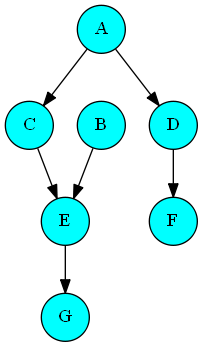

In [6]:
import networkx.drawing.nx_pydot as pdt
from IPython.display import Image, display

def display_graph(G, colors=None, index_col=None):
    A = pdt.to_pydot(G)
    for i, node in enumerate(A.get_nodes()):
        node.set_shape('circle')
        node.set_style('filled')
        if colors is not None and index_col is not None:
            node.set_fillcolor(colors[node.get_attributes()[index_col]]['fillcolor'])
            node.set_fontcolor(colors[node.get_attributes()[index_col]]['fontcolor'])
        else:
            node.set_fillcolor('cyan')
            node.set_fontcolor('black')
    plt = Image(A.create_png())
    display(plt)
    
display_graph(G)

### Start Node, Finish Node and Subgraph

Before we begin our calculation, we're going to create a functionality to add a _start node_ and a _finish node_ into our graph. This is done to mark the beginning and the endpoint of a project. We can then add another functionality to create a subgraph which contains only the nodes between the start node and the finish node. This allows us to break up a large project into smaller, more manageable sub-projects, especially now in the age of _Agile_ and _Iterative Development_.

First, we're going to add a finish node. This "activity" has a duration of zero. The finish node is connected to a set of activities that we want to accomplish. If the objective is not specified, then this set of activities is assumed to be all activities in the project that doesn't have a successor (meaning the entire project).

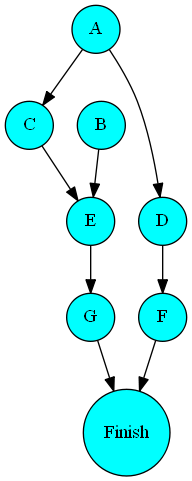

In [7]:
def add_finish_node(G, leaf_nodes=None):
    if G.has_node('Finish'):
        G.remove_node('Finish')
    if leaf_nodes is None:
        leaf_nodes = [node for node in G.nodes() if not list(G.successors(node))]
    G.add_node('Finish')
    G.node['Finish']['Optimistic'] = 0
    G.node['Finish']['Normal'] = 0
    G.node['Finish']['Pessimistic'] = 0
    G.node['Finish']['Expected'] = 0
    G.node['Finish']['Type'] = 'normal'
    for node in leaf_nodes:
        G.add_edge(node, 'Finish')
    return G
        
G = add_finish_node(G)
display_graph(G)

Next, we're going to add a start node. The start node is connected to all the highest ancestors of the finish node. By doing this, we cover all the predecessor nodes that are required to accomplish the finish node.

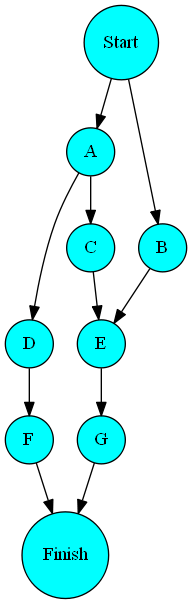

In [8]:
def add_start_node(G, finish_node='Finish'):
    if G.has_node('Start'):
        G.remove_node('Start')
    root_nodes = [node for node in nx.ancestors(G, finish_node) if not list(G.predecessors(node))]
    G.add_node('Start')
    G.node['Start']['Optimistic'] = 0
    G.node['Start']['Normal'] = 0
    G.node['Start']['Pessimistic'] = 0
    G.node['Start']['Expected'] = 0
    G.node['Start']['Type'] = 'normal'
    for node in root_nodes:
        G.add_edge('Start', node)
    return G

G = add_start_node(G)
display_graph(G)

After adding the start node and the finish node, we're going to create a new graph which contains only the nodes between the start node and the finish node. This is going to isolate only all the necessary activities to complete the objective while ignoring the rest.

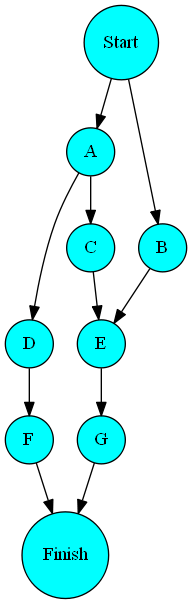

In [9]:
def create_subgraph(G):
    nodes = [node for node in nx.ancestors(G, 'Finish') if node in nx.descendants(G, 'Start')]
    nodes.extend(['Start', 'Finish'])
    return G.subgraph(nodes)
    
H = create_subgraph(G)    
display_graph(H)

### Forward Pass, Backward Pass and Slack

Each activity in the project is going to have 6 attributes:
-  The expected duration time
-  The early start time (ES)
-  The early finish time (EF)
-  The late start time (LS)
-  The late finish (LF)
-  The slack

In order to determine this information it is assumed that the activities and normal duration times are given.

### Forward Pass

The first step is to determine the ES and FS. The ES is defined as the maximum EF of all predecessor activities, unless the activity in question is the first activity, for which the ES is zero. The EF is the ES plus the task duration (EF = ES + duration).

-  The ES for _start_ is zero since it is the first activity. Since the duration is zero, the EF is also zero. This EF is used as the ES for _a_ and _b_.
-  The ES for _a_ is zero. The duration (4 work days) is added to the ES to get an EF of four. This EF is used as the ES for _c_ and _d_.
-  The ES for _b_ is zero. The duration (5.33 work days) is added to the ES to get an EF of 5.33.
-  The ES for _c_ is four. The duration (5.17 work days) is added to the ES to get an EF of 9.17.
-  The ES for _d_ is four. The duration (6.33 work days) is added to the ES to get an EF of 10.33. This EF is used as the ES for _f_.
-  The ES for _e_ is the greatest EF of its predecessor activities (_b_ and _c_). Since _b_ has an EF of 5.33 and _c_ has an EF of 9.17, the ES of _e_ is 9.17. The duration (5.17 work days) is added to the ES to get an EF of 14.34. This EF is used as the ES for _g_.
-  The ES for _f_ is 10.33. The duration (4.5 work days) is added to the ES to get an EF of 14.83.
-  The ES for _g_ is 14.34. The duration (5.17 work days) is added to the ES to get an EF of 19.51.
-  The ES for _finish_ is the greatest EF of its predecessor activities (_f_ and _g_). Since _f_ has an EF of 14.83 and _g_ has an EF of 19.51, the ES of _finish_ is 19.51. _Finish_ is a milestone (and therefore has a duration of zero), so the EF is also 19.51.

Barring any unforeseen events, the project should take 19.51 work days to complete.

### Topological Sorting

In computer science, topological sorting is a sorting algorithm which sorts all the nodes in a directed acyclic graph such that all the parent nodes will always appear before the child nodes.

By using topological sorting, all the calculations above can be done efficiently in a few lines of code, regardless of the number of activities involved.

In [10]:
for node in nx.topological_sort(H):
    parents = list(H.predecessors(node))
    if not parents:
        H.node[node]['ES'] = 0
    else:
        H.node[node]['ES'] = max(H.node[x]['EF'] for x in parents)
    H.node[node]['EF'] = round(H.node[node]['ES'] + H.node[node]['Expected'], 2)
    
dict(H.nodes(data=True))  

{'A': {'Optimistic': 2,
  'Normal': 4,
  'Pessimistic': 6,
  'Expected': 4.0,
  'Type': 'normal',
  'ES': 0,
  'EF': 4.0},
 'B': {'Optimistic': 3,
  'Normal': 5,
  'Pessimistic': 9,
  'Expected': 5.33,
  'Type': 'normal',
  'ES': 0,
  'EF': 5.33},
 'C': {'Optimistic': 4,
  'Normal': 5,
  'Pessimistic': 7,
  'Expected': 5.17,
  'Type': 'normal',
  'ES': 4.0,
  'EF': 9.17},
 'D': {'Optimistic': 4,
  'Normal': 6,
  'Pessimistic': 10,
  'Expected': 6.33,
  'Type': 'normal',
  'ES': 4.0,
  'EF': 10.33},
 'E': {'Optimistic': 4,
  'Normal': 5,
  'Pessimistic': 7,
  'Expected': 5.17,
  'Type': 'normal',
  'ES': 9.17,
  'EF': 14.34},
 'F': {'Optimistic': 3,
  'Normal': 4,
  'Pessimistic': 8,
  'Expected': 4.5,
  'Type': 'normal',
  'ES': 10.33,
  'EF': 14.83},
 'G': {'Optimistic': 3,
  'Normal': 5,
  'Pessimistic': 8,
  'Expected': 5.17,
  'Type': 'normal',
  'ES': 14.34,
  'EF': 19.51},
 'Finish': {'Optimistic': 0,
  'Normal': 0,
  'Pessimistic': 0,
  'Expected': 0,
  'Type': 'normal',
  'ES':

### Backward Pass

The next step is to determine the late start (LS) and late finish (LF) of each activity. This will eventually show if there are activities that have slack. The LF is defined as the minimum LS of all successors activities, unless the activity is the last activity, for which the LF equals the EF. The LS is the LF minus the task duration (LS = LF - duration).

-  The LF for _finish_ is equal to the EF (19.51 work days) since it is the last activity in the project. Since the duration is zero, the LS is also 19.51 work days. This will be used as the LF for _f_ and _g_.
-  The LF for _g_ is 19.51 work days. The duration (5.17 work days) is subtracted from the LF to get an LS of 14.34 work days. This will be used as the LF for _e_.
-  The LF for _f_ is 19.51 work days. The duration (4.5 work days) is subtracted from the LF to get an LS of 15.01 work days. This will be used as the LF for _d_.
-  The LF for _e_ is 14.34 work days. The duration (5.17 work days) is subtracted from the LF to get an LS of 9.17 work days. This will be used as the LF for _b_ and _c_.
-  The LF for _d_ is 15.01 work days. The duration (6.33 work days) is subtracted from the LF to get an LS of 8.68 work days.
-  The LF for _c_ is 9.17 work days. The duration (5.17 work days) is subtracted from the LF to get an LS of 4 work days.
-  The LF for _b_ is 9.17 work days. The duration (5.33 work days) is subtracted from the LF to get an LS of 3.84 work days.
-  The LF for _a_ is the minimum LS of its successor activities. Since _c_ has an LS of 4 work days and _d_ has an LS of 8.68 work days, the LF for _a_ is 4 work days. The duration (4 work days) is subtracted from the LF to get an LS of 0 work days.
-  The LF for _start_ is the minimum LS of its successor activities. Since _a_ has an LS of 0 work days and _b_ has an LS of 3.84 work days, the LS is 0 work days.

In [11]:
for node in list(reversed(list(nx.topological_sort(H)))):
    children = list(H.successors(node))
    if not children:
        H.node[node]['LF'] = H.node[node]['EF']
    else:
        H.node[node]['LF'] = min(H.node[x]['LS'] for x in children)
    H.node[node]['LS'] = round(H.node[node]['LF'] - H.node[node]['Expected'], 2)
    
dict(H.nodes(data=True))

{'A': {'Optimistic': 2,
  'Normal': 4,
  'Pessimistic': 6,
  'Expected': 4.0,
  'Type': 'normal',
  'ES': 0,
  'EF': 4.0,
  'LF': 4.0,
  'LS': 0.0},
 'B': {'Optimistic': 3,
  'Normal': 5,
  'Pessimistic': 9,
  'Expected': 5.33,
  'Type': 'normal',
  'ES': 0,
  'EF': 5.33,
  'LF': 9.17,
  'LS': 3.84},
 'C': {'Optimistic': 4,
  'Normal': 5,
  'Pessimistic': 7,
  'Expected': 5.17,
  'Type': 'normal',
  'ES': 4.0,
  'EF': 9.17,
  'LF': 9.17,
  'LS': 4.0},
 'D': {'Optimistic': 4,
  'Normal': 6,
  'Pessimistic': 10,
  'Expected': 6.33,
  'Type': 'normal',
  'ES': 4.0,
  'EF': 10.33,
  'LF': 15.01,
  'LS': 8.68},
 'E': {'Optimistic': 4,
  'Normal': 5,
  'Pessimistic': 7,
  'Expected': 5.17,
  'Type': 'normal',
  'ES': 9.17,
  'EF': 14.34,
  'LF': 14.34,
  'LS': 9.17},
 'F': {'Optimistic': 3,
  'Normal': 4,
  'Pessimistic': 8,
  'Expected': 4.5,
  'Type': 'normal',
  'ES': 10.33,
  'EF': 14.83,
  'LF': 19.51,
  'LS': 15.01},
 'G': {'Optimistic': 3,
  'Normal': 5,
  'Pessimistic': 8,
  'Expecte

### Slack

The next step is to determine if any activities have slack. Slack is computed in one of two ways, slack = LF - EF _or_ slack = LS - ES. Activities that have slack can be delayed without chaing the overall time of the project.

In [12]:
for node in H.nodes():
    H.node[node]['Slack'] = round(H.node[node]['LF'] - H.node[node]['EF'], 2)
    
dict(H.nodes(data=True))

{'A': {'Optimistic': 2,
  'Normal': 4,
  'Pessimistic': 6,
  'Expected': 4.0,
  'Type': 'normal',
  'ES': 0,
  'EF': 4.0,
  'LF': 4.0,
  'LS': 0.0,
  'Slack': 0.0},
 'B': {'Optimistic': 3,
  'Normal': 5,
  'Pessimistic': 9,
  'Expected': 5.33,
  'Type': 'normal',
  'ES': 0,
  'EF': 5.33,
  'LF': 9.17,
  'LS': 3.84,
  'Slack': 3.84},
 'C': {'Optimistic': 4,
  'Normal': 5,
  'Pessimistic': 7,
  'Expected': 5.17,
  'Type': 'normal',
  'ES': 4.0,
  'EF': 9.17,
  'LF': 9.17,
  'LS': 4.0,
  'Slack': 0.0},
 'D': {'Optimistic': 4,
  'Normal': 6,
  'Pessimistic': 10,
  'Expected': 6.33,
  'Type': 'normal',
  'ES': 4.0,
  'EF': 10.33,
  'LF': 15.01,
  'LS': 8.68,
  'Slack': 4.68},
 'E': {'Optimistic': 4,
  'Normal': 5,
  'Pessimistic': 7,
  'Expected': 5.17,
  'Type': 'normal',
  'ES': 9.17,
  'EF': 14.34,
  'LF': 14.34,
  'LS': 9.17,
  'Slack': 0.0},
 'F': {'Optimistic': 3,
  'Normal': 4,
  'Pessimistic': 8,
  'Expected': 4.5,
  'Type': 'normal',
  'ES': 10.33,
  'EF': 14.83,
  'LF': 19.51,
  '

-  _Start_ and _finish_ are milestones and by definition have no duration, therefore they can have no slack (0 work days).
-  The activities on the critical path by definition have a slack of zero; however, it is always a good idea to check the math anyway when drawing by hand.
   -  $LF_a - EF_a = 4 - 4 = 0$
   -  $LF_c - EF_c = 9.17 - 9.17 = 0$
   -  $LF_e - EF_e = 14.34 - 14.34 = 0$
   -  $LF_g - EF_g = 19.51 - 19.51 = 0$
-  Activity _b_ has an LF of 9.17 and an EF of 5.33, so the slack is 3.84 work days.
-  Activity _d_ has an LF of 15.01 and an EF of 10.33, so the slack is 4.68 work days.
-  Activity _f_ has an LF of 19.51 and an EF of 14.83, so the slack is 4.68 work days.

Therefore, activity _b_ can be delayed almost 4 work days without delaying the project. Likewise, activity _d_ __or__ activity _f_ can be delayed 4.68 work days without delaying the project (alternatively, _d_ and _f_ can be delayed 2.34 work days each).

### Critical Path

The critical path is the path that takes the __longest__ to complete. To determine the path times, add the task durations for all available paths. Activities that are on the critical path have a slack of zero.

In [13]:
[node for node in nx.topological_sort(H) if H.node[node]['Slack'] == 0]

['Start', 'A', 'C', 'E', 'G', 'Finish']

In [14]:
max(nx.all_simple_paths(H, source='Start', target='Finish'), key=lambda path: sum(H.node[node]['Expected'] for node in path))

['Start', 'A', 'C', 'E', 'G', 'Finish']

The critical path is _aceg_ and the critical time is 19.51 work days. It is important to note that there can be more than one critical path (in a project more complex than this example) or that the critical path can change. For example, let's say that activities _d_ and _f_ take their pessimistic (_p_) times to complete instead of their expected (_te_) times. The critical path is now _adf_ and the critical time is 22 work days. On the other hand, if activity _c_ can be reduced to one work day, the path time for _aceg_ is reduced to 15.34 work days, which is slightly less than the time of the new critical path, _beg_ (15.67 work days).

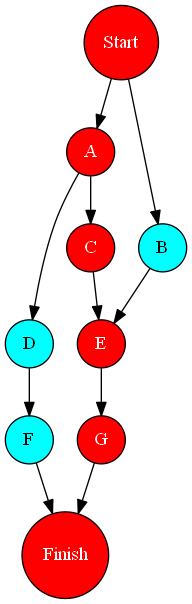

In [15]:
def critical_path(H, src='Start', dest='Finish'):
    path_duration = lambda path: sum(H.node[node]['Expected'] for node in path)
    return max(nx.all_simple_paths(H, source='Start', target='Finish'), key=path_duration)

def highlight_critical_path(H, src='Start', dest='Finish'):
    critical = critical_path(H, src=src, dest=dest)
    for node in H.nodes():
        if node in critical:
            H.node[node]['Type'] = 'critical'
        else:
            H.node[node]['Type'] = 'normal'
    return H

H = highlight_critical_path(H)

colors = {'normal': {'fillcolor': 'cyan', 'fontcolor': 'black'},
          'critical': {'fillcolor': 'red', 'fontcolor': 'white'}}
display_graph(H, colors=colors, index_col='Type')

After we've finished calculating all the information above, we can now display the information in a pretty Gantt chart.

In [16]:
import plotly.graph_objs as go
import plotly.figure_factory as ff
import plotly.offline as py
from IPython.display import display
from datetime import datetime, timedelta

def display_gantt_chart(G, start='ES', finish='EF', begin=None, colors=None, reverse_colors=False,
                        index_col=None, show_colorbar=False, title='Gantt Chart', bar_width=0.2,
                        showgrid_x=True, showgrid_y=True):
    if begin is None:
        begin = datetime.now().date()
    else:
        begin = datetime.strptime(begin, '%Y-%m-%d').date()
    df = [dict(Task   = node,
               Start  = str(begin + timedelta(days=G.node[node][start])),
               Finish = str(begin + timedelta(G.node[node][finish])),
               Type   = G.node[node]['Type'])
          for node in list(reversed(list(nx.topological_sort(G))))]
    fig = ff.create_gantt(df, colors=colors, reverse_colors=reverse_colors, index_col=index_col,
                          show_colorbar=show_colorbar, title=title, bar_width=bar_width,
                          showgrid_x=showgrid_x, showgrid_y=showgrid_y)
    f = go.FigureWidget(fig)
    display(f)


colors = {'normal': 'rgb(117, 218, 255)',
          'critical': 'rgb(255, 0, 0)'}
display_gantt_chart(H, colors=colors, index_col='Type', show_colorbar=True)

FigureWidget({
    'data': [{'marker': {'color': 'white'},
              'name': '',
              'showlegend…

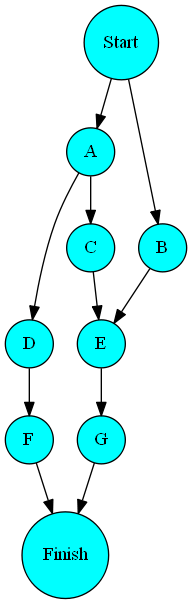

FigureWidget({
    'data': [{'marker': {'color': 'white'},
              'name': '',
              'showlegend…

In [17]:
import pandas as pd
import networkx as nx
import networkx.drawing.nx_pydot as pdt
import plotly.graph_objs as go
import plotly.figure_factory as ff
import plotly.offline as py
from IPython.display import Image, display
from datetime import datetime, timedelta
from collections import defaultdict

def read_files(activity_file, edge_file, header=['infer','infer'],
               id=[False,False], coeffs=[1,4,1], key=True):
    
    # Read activity file and edge file into a pd.DataFrame
    df1 = pd.read_csv(activity_file, header=header[0])
    df2 = pd.read_csv(edge_file, header=header[1])
    
    # If either file contains an ID column, drop it
    if id[0]:
        df1 = df1.drop(df1.columns[0], axis=1)
    if id[1]:
        df2 = df2.drop(df2.columns[0], axis=1)
        
    # First we're going to convert the activity file into
    # a dictionary. Iterate over rows in dataframe.
    activity_dict = defaultdict(dict)
    for _, row in df1.iterrows():
        
        # The node is the first element of row
        # Optimistic time is the second element
        # Normal time is the third element
        # Pessimistic time is the fourth element
        node = row.iat[0]
        activity_dict[node]['Optimistic'] = row.iat[1]
        activity_dict[node]['Normal'] = row.iat[2]
        activity_dict[node]['Pessimistic'] = row.iat[3]
        
        # Since we haven't calculated the critical path
        # we're assuming the node is of type 'normal'
        # instead of 'critical'
        activity_dict[node]['Type'] = 'normal'
        activity_dict[node]['Status'] = 'To Do'
        activity_dict[node]['StartDate'] = None
        activity_dict[node]['FinishDate'] = None
        
        # Calculated the expected time using the formula:
        #
        #    E = (O + 4M + P) / 6
        #
        # where O = Optimistic Time
        #       M = Most Likely Time / Normal Time
        #       P = Pessimistic Time
        #
        # The coefficients can be changed in the 'coeffs'
        # parameter.
        #
        activity_dict[node]['Expected'] =\
            round((coeffs[0]*activity_dict[node]['Optimistic'] +\
                   coeffs[1]*activity_dict[node]['Normal'] +\
                   coeffs[2]*activity_dict[node]['Pessimistic'])\
                   / float(sum(coeffs)), 2)
        
        activity_dict[node]['Actual'] = activity_dict[node]['Expected']
    
    # Next we're going to convert the edge file into a list
    edge_list = []
    if key:
        # If the edge file uses parent IDs and child IDs
        # then we need to refer to its location in the
        # activity file
        for _, row in df2.iterrows():
            u = df1.iat[row.iat[0]-1, 0]
            v = df1.iat[row.iat[1]-1, 0]
            edge_list.append((u, v))
    else:
        # If the edge file uses parent nodes and child nodes
        # instead of IDs, simply add an edge between the nodes
        for _, row in df2.iterrows():
            u = row.iat[0]
            v = row.iat[1]
            edge_list.append((u, v))
            
    return activity_dict, edge_list


def to_activity_dict(activity_matrix, coeffs=[1,4,1]):
    """
    This function converts a 2-dimensional matrix into
    a dictionary of nodes and attributes
    """
    activity_dict = defaultdict(dict)
    for row in activity_matrix:
        
        # The node is the first element of row
        # Optimistic time is the second element
        # Normal time is the third element
        # Pessimistic time is the fourth element
        node = row[0]
        activity_dict[node]['Optimistic'] = row[1]
        activity_dict[node]['Normal'] = row[2]
        activity_dict[node]['Pessimistic'] = row[3]
        
        # Since we haven't calculated the critical path
        # we're assuming the node is of type 'normal'
        # instead of 'critical'
        activity_dict[node]['Type'] = 'normal'
        activity_dict[node]['Status'] = 'To Do'
        activity_dict[node]['StartDate'] = None
        activity_dict[node]['FinishDate'] = None
        
        # Calculated the expected time using the formula:
        #
        #    E = (O + 4M + P) / 6
        #
        # where O = Optimistic Time
        #       M = Most Likely Time / Normal Time
        #       P = Pessimistic Time
        #
        # The coefficients can be changed in the 'coeffs'
        # parameter.
        #
        activity_dict[node]['Expected'] =\
            round((coeffs[0]*activity_dict[node]['Optimistic'] +\
                   coeffs[1]*activity_dict[node]['Normal'] +\
                   coeffs[2]*activity_dict[node]['Pessimistic'])\
                   / float(sum(coeffs)), 2)
        
        activity_dict[node]['Actual'] = activity_dict[node]['Expected']
        
    return activity_dict


def to_edge_list(adjacency_list, reverse=False):
    """
    This function converts a dictionary of lists adjacency
    representation into a list of edge tuples.
    """
    if not reverse:
        edge_list = [(node, nbr) for node, neighbors in adjacency_list.items() for nbr in neighbors]
    else:
        edge_list = [(nbr, node) for node, neighbors in adjacency_list.items() for nbr in neighbors]
    return edge_list


def parse_graph(activities, edges, title='Project X', begin=None, deadline=None):
    """
    Create a dependency graph from a list of activities and edges
    """
    # Create a new Directed Graph and set its
    # Title, Begin and Deadline. The Begin date
    # is today's date if it is not provided.
    G = nx.DiGraph()
    G.graph['Title'] = title
    G.graph['Begin'] = str(datetime.now().date()) if begin is None else begin
    G.graph['Deadline'] = deadline
    
    # networkx.graph.add_nodes_from() only accepts
    # list of nodes or list of tuples. By using
    # dict.items(), we give one more option to
    # add nodes using a dictionary of nodes and
    # attributes.
    if isinstance(activities, dict):
        G.add_nodes_from(activities.items())
    else:
        G.add_nodes_from(activities)
        
    # Add edges into graph using an edge list
    G.add_edges_from(edges)
    
    return G
    
    
def display_graph(G, colors=None, index_col=None):
    """
    This function displays the visual representation
    of the dependency network
    """
    # Convert G to an AGraph to visualize it
    # using GraphViz. We can also use Matplotlib
    # but I find GraphViz to be prettier.
    A = pdt.to_pydot(G)
    
    # Set the node attributes for styling
    for i, node in enumerate(A.get_nodes()):
        node.set_shape('circle')
        node.set_style('filled')
        
        if colors is not None and index_col is not None:
            # If an index column and a colors dictionary is provided,
            # we want classify the nodes based on the attribute value
            # at index column and visualize the difference
            node.set_fillcolor(colors[node.get_attributes()[index_col]]['fillcolor'])
            node.set_fontcolor(colors[node.get_attributes()[index_col]]['fontcolor'])
        else:    
            # Otherwise, just set the color to default
            node.set_fillcolor('cyan')
            node.set_fontcolor('black')
            
    # Display the created AGraph
    plt = Image(A.create_png())
    display(plt)

    
def add_finish_node(G, leaf_nodes=None):
    """
    This function adds a 'Finish' node to the dependency network
    """
    # Remove 'Finish' node from G if G already has it
    if G.has_node('Finish'):
        G.remove_node('Finish')
        
    # If the leaf nodes are not provided, search for
    # all the lowest descendants in G.
    if leaf_nodes is None:
        leaf_nodes = [node for node in G.nodes() if not list(G.successors(node))]
        
    # Create a 'Finish' node
    G.add_node('Finish')
    G.node['Finish']['Optimistic'] = 0
    G.node['Finish']['Normal'] = 0
    G.node['Finish']['Pessimistic'] = 0
    G.node['Finish']['Expected'] = 0
    G.node['Finish']['Actual'] = 0
    G.node['Finish']['Type'] = 'normal'
    G.node['Finish']['Status'] = 'To Do'
    G.node['Finish']['StartDate'] = None
    G.node['Finish']['FinishDate'] = None
    
    # Add an edge from all the leaf nodes to 'Finish' node
    for node in leaf_nodes:
        G.add_edge(node, 'Finish')
    return G


def add_start_node(G, completed=None, finish_node='Finish'):
    """
    This function adds a 'Start' node to the dependency network
    """
    # Remove 'Start' node from G if G already has it
    if G.has_node('Start'):
        G.remove_node('Start')
        
    if completed is not None:
        # If some tasks have already been completed
        # then we're going to look for the highest
        # ancestors of finish node that have not been
        # completed.
        
        # First, we're going connect all the completed
        # nodes to a node called 'Completed'. All the
        # ancestors of 'Completed' are nodes we want
        # to exclude.
        G.add_node('Completed')
        for node in completed:
            G.add_edge(node, 'Completed')
        
        # Create a subgraph which contains only nodes
        # that have not been completed
        nodes = [node for node in nx.ancestors(G, finish_node) if node not in nx.ancestors(G, 'Completed')]
        nodes.remove('Completed')
        H = nx.DiGraph(G.subgraph(nodes))
        
        # The root nodes are the nodes in this new graph
        # which is the ancestors of the finish node and
        # does not have a predecessor.
        root_nodes = [node for node in nx.ancestors(H, finish_node) if not list(H.predecessors(node))]
        
        # Don't forget to remove the 'Completed' node from
        # the original graph
        G.remove_node('Completed')
    else:
        # Otherwise, the root nodes are simply the ancestors
        # of finish node which does not have a predecessor.
        root_nodes = [node for node in nx.ancestors(G, finish_node) if not list(G.predecessors(node))]
    
    # Create a 'Start' node
    G.add_node('Start')
    G.node['Start']['Optimistic'] = 0
    G.node['Start']['Normal'] = 0
    G.node['Start']['Pessimistic'] = 0
    G.node['Start']['Expected'] = 0
    G.node['Start']['Actual'] = 0
    G.node['Start']['Type'] = 'normal'
    G.node['Start']['Status'] = 'Available'
    G.node['Start']['StartDate'] = None
    G.node['Start']['FinishDate'] = None
    
    # Add an edge from 'Start' node to all the root nodes
    for node in root_nodes:
        G.add_edge('Start', node)
    return G


def create_subgraph(G, src='Start', dest='Finish', title=None, begin=None, deadline=None):
    
    # First we're going to search for all the nodes in between
    # src and dest, including the src and dest
    nodes = [node for node in nx.ancestors(G, dest) if node in nx.descendants(G, src)]
    nodes.extend([src, dest])
    
    # Then we create a new graph from G which only contains
    # the nodes we searched previously
    H = nx.DiGraph(G.subgraph(nodes))
    
    # Set the Title, Begin and Deadline for the new graph.
    # If the values are not provided, use the values from G.
    H.graph['Title'] = G.graph['Title'] if title is None else title
    H.graph['Begin'] = G.graph['Begin'] if begin is None else begin
    H.graph['Deadline'] = G.graph['Deadline'] if deadline is None else deadline
    return H


def init_graph(H, margin=0):
    """
    Calculates all the node attributes, such as
    ES, LS, EF, LF and Slack.
    """
    # Perform a forward and backward pass
    forward_pass(H)
    backward_pass(H)
    
    # Calculates the Slack
    calculate_slack(H)
    
    # Highlight critical activities
    highlight_critical_activities(H, margin=margin)
    
    return H


def forward_pass(H):
    """
    Calculate the Early Start and the Early Finish
    of the nodes in the graph
    """
    # Convert the begin date into a date object
    begin = datetime.strptime(H.graph['Begin'], '%Y-%m-%d').date()
    
    # Traverse the nodes in Topological order
    for node in nx.topological_sort(H):
        
        parents = list(H.predecessors(node))
        if not parents:
            # If the node has no predecessors, then
            # it is the first activity. Set the
            # Early Start to zero.
            H.node[node]['ES'] = 0
        else:
            # Otherwise, the Early Start of this
            # activity is the latest Early Finish
            # of its predecessors activities.
            H.node[node]['ES'] = max(H.node[x]['EF'] for x in parents)
        
        if H.node[node]['StartDate'] is not None:
            # If the start date is set, then
            # the start time cannot be less
            # than the start date
            start = datetime.strptime(H.node[node]['StartDate'], '%Y-%m-%d').date()
            H.node[node]['ES'] = max(H.node[node]['ES'], (start - begin).days)
        
        # By default, the Early Finish of this activity is
        # simply the Early Start plus the duration.
        H.node[node]['EF'] = round(H.node[node]['ES'] + H.node[node]['Actual'], 2)
        
        if H.node[node]['FinishDate'] is not None:
            # If a finish date is set, then the Early Finish
            # cannot be greater than the finish date but also
            # cannot be less than the Early Start.
            finish = datetime.strptime(H.node[node]['FinishDate'], '%Y-%m-%d').date()
            H.node[node]['EF'] = min(H.node[node]['EF'], (finish - begin).days)
            H.node[node]['EF'] = max(H.node[node]['EF'], H.node[node]['ES'])

    return H


def backward_pass(H):
    """
    Calculate the Late Start and the Late Finish
    of the nodes in the graph
    """
    # Convert the begin date into a date object
    begin = datetime.strptime(H.graph['Begin'], '%Y-%m-%d').date()
    
    # Traverse the nodes in reverse topological order
    for node in list(reversed(list(nx.topological_sort(H)))):
        
        children = list(H.successors(node))
        if not children:
            # If the node has no successors, then
            # it is the last activity.
            if H.graph['Deadline'] is None:
                # If a deadline is not set, then
                # the Late Finish is the same as
                # the Early Finish.
                H.node[node]['LF'] = H.node[node]['EF']
            else:
                # If a deadline is set, then the Late Finish
                # is the number of days between begin and deadline
                # but it cannot be less than the Early Finish
                deadline = datetime.strptime(H.graph['Deadline'], '%Y-%m-%d').date()
                H.node[node]['LF'] = max((deadline - begin).days, H.node[node]['EF'])
        else:
            # Otherwise, the Late Finish of this
            # activity is the minimum Late Start
            # of its successors activities.
            H.node[node]['LF'] = min(H.node[x]['LS'] for x in children)
            
        if H.node[node]['FinishDate'] is not None:
            # If a finish date has been set, then
            # the Late Finish cannot be greater than
            # the finish date, but it also cannot
            # be less than the Early Finish
            finish = datetime.strptime(H.node[node]['FinishDate'], '%Y-%m-%d').date()
            H.node[node]['LF'] = min(H.node[node]['LF'], (finish - begin).days)
            H.node[node]['LF'] = max(H.node[node]['LF'], H.node[node]['EF'])
        
        # The Late Start of this activity is simply
        # the Late Finish minus the duration. It cannot
        # be less than the Early Start.
        H.node[node]['LS'] = round(H.node[node]['LF'] - H.node[node]['Actual'], 2)
        H.node[node]['LS'] = max(H.node[node]['LS'], H.node[node]['ES'])
        
    return H


def calculate_slack(H):
    """
    Calculates the Slack of the activities
    in the graph
    """
    for node in H.nodes():
        # The Slack is calculated by finding the difference
        # between Early Start and Late Start or Early Finish
        # and Late Finish
        H.node[node]['Slack'] = round(H.node[node]['LF'] - H.node[node]['EF'], 2)
    return H


def reset(G, duration=None, margin=0):
    
    for node in G.nodes():
        if duration is not None:
            G.node[node]['Actual'] = G.node[node][duration]
        G.node[node]['StartDate'] = None
        G.node[node]['FinishDate'] = None
        G.node[node]['Status'] = 'To Do'

    G.node['Start']['Status'] = 'Available'    
    return init_graph(G, margin=margin)
        
    
def highlight_critical_activities(H, src='Start', dest='Finish', margin=0):
    """
    Label the nodes as 'critical' or 'normal' based on
    whether they lie on the critical path
    """    
    critical = critical_activities(H, src=src, dest=dest, margin=margin)
    for node in H.nodes():
        if node in critical:
            H.node[node]['Type'] = 'critical'
        else:
            H.node[node]['Type'] = 'normal'
    return H
        
    
def critical_paths(H, src='Start', dest='Finish', margin=0):
    """
    A function to find all the critical paths and the duration
    of the paths in graph H from source to destination
    """
    # This is a function to calculate the total duration of a path.
    path_duration = lambda path: sum(H.node[node]['Actual'] for node in path)
    
    # All simple paths between source and destination
    paths = list(nx.all_simple_paths(H, source=src, target=dest))
    
    # Find the maximum duration in the path between src and dest.
    max_duration = max(path_duration(path) for path in paths)
    
    # A critical path is a path between src and dest which has the maximum duration
    critical_paths = [path for path in paths if (max_duration - path_duration(path)) <= margin]
    
    return critical_paths, max_duration


def critical_activities(H, src='Start', dest='Finish', margin=0):
    """
    Return a set of activities that lie on the critical path
    """   
    critical = critical_paths(H, src=src, dest=dest, margin=margin)[0]
    return set(activity for path in critical for activity in path)


def display_gantt_chart(G, begin=None, colors=None, reverse_colors=False, index_col='Type',
                        show_colorbar=True, title=None, bar_width=0.2, showgrid_x=True,
                        showgrid_y=True, group_tasks=True):
    """
    This function displays a Gantt chart representation
    of the dependency network
    """
    # If a begin date is not provided, use the begin date of G
    if begin is None:
        begin = G.graph['Begin']
        
    # Convert date string into datetime format
    begin = datetime.strptime(begin, '%Y-%m-%d').date()
    
    # If a title is not provided, use the title of G
    if title is None:
        title = G.graph['Title']
        
    # Convert graph G into a dataframe format that ff.create_gantt() can read
    df = to_dataframe(G, begin, index_col)
    
    # Create Gantt chart
    fig = ff.create_gantt(df, colors=colors, reverse_colors=reverse_colors, index_col=index_col,
                          show_colorbar=show_colorbar, title=title, bar_width=bar_width,
                          showgrid_x=showgrid_x, showgrid_y=showgrid_y, group_tasks=group_tasks)
    
    # Convert Gantt chart into a figure widget and display it
    f = go.FigureWidget(fig)
    display(f)
    
    
def to_dataframe(G, begin, index_col):
    df = []
    for node in nx.topological_sort(G):
        task = dict(Task   = node,
                    Start  = str(begin + timedelta(days=G.node[node]['ES'])),
                    Finish = str(begin + timedelta(days=G.node[node]['EF'])))
        task[index_col] = G.node[node][index_col]
        
        slack = dict(Task   = node,
                     Start  = str(begin + timedelta(days=G.node[node]['EF'])),
                     Finish = str(begin + timedelta(days=G.node[node]['LF'])))
        slack[index_col] = 'slack'
        
        df.extend([task, slack])
    return df


def PERT(G, leaf_nodes=None, completed=None, duration=None, title=None,
         begin=None, deadline=None, margin=0):
    G = add_finish_node(G, leaf_nodes=leaf_nodes)
    G = add_start_node(G, completed=completed)
    H = create_subgraph(G, title=title, begin=begin, deadline=deadline)
    H = reset(H, duration=duration, margin=margin)
    return H


def update_progress(H, date=None):
    
    if date is None:
        # If a date is not provided then it is
        # assumed to be today.
        date = str(datetime.now().date())
        
    # Convert the date string into a datetime object
    date = datetime.strptime(date, '%Y-%m-%d').date()
    
    # Convert the begin date into a date object
    begin = datetime.strptime(H.graph['Begin'], '%Y-%m-%d').date()
    
    for node in H.nodes():
        start  = begin + timedelta(days=H.node[node]['ES'])
        finish = begin + timedelta(days=H.node[node]['EF'])
        late   = begin + timedelta(days=H.node[node]['LF'])
        
        if H.node[node]['Status'] in ('To Do', 'Available'):
            if start < date:
                H.node[node]['StartDate'] = str(date)
        
        elif H.node[node]['Status'] in ('In Progress', 'Late'):
            if finish < date:
                H.node[node]['Actual'] = (date - start).days
            if H.node[node]['FinishDate'] is not None:
                finish_date = datetime.strptime(H.node[node]['FinishDate'], '%Y-%m-%d').date()
                if finish_date < date:
                    H.node[node]['FinishDate'] = str(date)
            H.node[node]['Status'] = 'Late' if late <= date else 'In Progress'
                    
        elif H.node[node]['Status'] == 'Completed':
            if finish > date:
                H.node[node]['Actual'] = max((date - start).days, 0)
                
    init_graph(H)
    return H


def change_status(H, activity, status, replace=False):
    
    if status != 'To Do':
        for node in nx.ancestors(H, activity):
            if replace:
                H.node[node]['Status'] = 'Completed'
            elif H.node[node]['Status'] != 'Completed':
                raise ValueError('\'{0}\' is not completed'.format(node))
    
    if status != 'Completed':
        for node in nx.descendants(H, activity):
            if replace:
                H.node[node]['Status'] = 'To Do'
            elif H.node[node]['Status'] not in ('To Do', 'Available'):
                raise ValueError('\'{0}\' has been started'.format(node))
    
    H.node[activity]['Status'] = status
    
    available = available_tasks(H)
    for node in H.nodes():
        if node in available:
            H.node[node]['Status'] = 'Available'
        elif H.node[node]['Status'] == 'Available':
            H.node[node]['Status'] = 'To Do'
    
    return H


def available_tasks(H):
    tasks = []
    for node in H.nodes():
        if H.node[node]['Status'] not in ('In Progress', 'Late', 'Completed'):
            predecessors = list(H.predecessors(node))
            if not predecessors or all(H.node[n]['Status'] == 'Completed' for n in predecessors):
                tasks.append(node)
    return tasks


def cluster(H, objectives):
    
    for node in H.nodes():
        H.node[node]['Cluster'] = 'None'

    for i in range(len(objectives)):
        nodes = list(nx.ancestors(H, objectives[i])) + [objectives[i]]
        for node in nodes:
            if H.node[node]['Cluster'] == 'None':
                H.node[node]['Cluster'] = 'Group {0}'.format(i + 1)
            else:
                H.node[node]['Cluster'] += ', {0}'.format(i + 1)
                    
    return H

    
if __name__ == '__main__':
    
    activities, edges = read_files('data/activity_list.csv', 'data/edge_list.csv', id=[True, True])
    G = parse_graph(activities, edges)
    
    H = PERT(G, begin='2019-07-14', deadline='2019-08-5')
    display_graph(H)
    
    colors = {'normal': 'rgb(255, 102, 255)',
              'critical': 'rgb(255, 0, 0)',
              'slack': 'rgb(255, 204, 255)'}
    display_gantt_chart(H, colors=colors, index_col='Type', show_colorbar=True)

In [18]:
H.node['C']['StartDate'] = '2019-07-21'
init_graph(H)
display_gantt_chart(H, colors=colors, index_col='Type', show_colorbar=True)

FigureWidget({
    'data': [{'marker': {'color': 'white'},
              'name': '',
              'showlegend…

In [19]:
H.node['C']['FinishDate'] = '2019-07-24'
init_graph(H)
display_gantt_chart(H, colors=colors, index_col='Type', show_colorbar=True)

FigureWidget({
    'data': [{'marker': {'color': 'white'},
              'name': '',
              'showlegend…

In [20]:
H.node['D']['FinishDate'] = '2019-07-27'
init_graph(H)
display_gantt_chart(H, colors=colors, index_col='Type', show_colorbar=True)

FigureWidget({
    'data': [{'marker': {'color': 'white'},
              'name': '',
              'showlegend…

In [21]:
H.graph['Begin'] = '2019-07-10'
init_graph(H)
display_gantt_chart(H, colors=colors, index_col='Type', show_colorbar=True)

FigureWidget({
    'data': [{'marker': {'color': 'white'},
              'name': '',
              'showlegend…

In [22]:
H.graph['Deadline'] = '2019-08-02'
init_graph(H)
display_gantt_chart(H, colors=colors, index_col='Type', show_colorbar=True)

FigureWidget({
    'data': [{'marker': {'color': 'white'},
              'name': '',
              'showlegend…

In [23]:
reset(H)
display_gantt_chart(H, colors=colors, index_col='Type', show_colorbar=True)

FigureWidget({
    'data': [{'marker': {'color': 'white'},
              'name': '',
              'showlegend…

In [24]:
colors = {'To Do':       'rgb(0, 0, 0)',
          'Available':   'rgb(144, 238, 144)',
          'In Progress': 'rgb(255, 255, 0)',
          'Completed':   'rgb(255, 102, 255)',
          'Late':        'rgb(255, 0, 0)',
          'slack':       'rgb(255, 204, 255)'}

display_gantt_chart(H, colors=colors, index_col='Status', show_colorbar=True)

FigureWidget({
    'data': [{'marker': {'color': 'white'},
              'name': '',
              'showlegend…

In [25]:
change_status(H, 'Start', 'Completed')
change_status(H, 'A', 'Completed')
change_status(H, 'C', 'In Progress')
change_status(H, 'D', 'Completed')

update_progress(H, date='2019-07-21')
display_gantt_chart(H, colors=colors, index_col='Status', show_colorbar=True)

FigureWidget({
    'data': [{'marker': {'color': 'white'},
              'name': '',
              'showlegend…

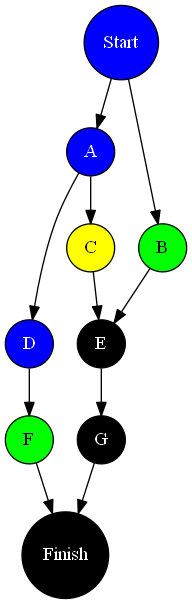

In [26]:
colors = {'To Do':       {'fillcolor': 'black',
                          'fontcolor': 'white'},
          'Available':   {'fillcolor': 'green',
                          'fontcolor': 'black'},
          'In Progress': {'fillcolor': 'yellow',
                          'fontcolor': 'black'},
          'Completed':   {'fillcolor': 'blue',
                          'fontcolor': 'white'},
          'Late':        {'fillcolor': 'red',
                          'fontcolor': 'white'}}

display_graph(H, colors=colors, index_col='Status')

In [27]:
reset(H)
cluster(H, objectives=['E', 'D'])

colors = {'Group 1':    'rgb(255, 102, 255)',
          'Group 2':    'rgb(255, 255, 0)',
          'Group 1, 2': 'rgb(144, 238, 144)',
          'None':       'rgb(0, 0, 0)',
          'slack':      'rgb(255, 204, 255)'}
display_gantt_chart(H, colors=colors, index_col='Cluster', show_colorbar=True)

FigureWidget({
    'data': [{'marker': {'color': 'white'},
              'name': '',
              'showlegend…

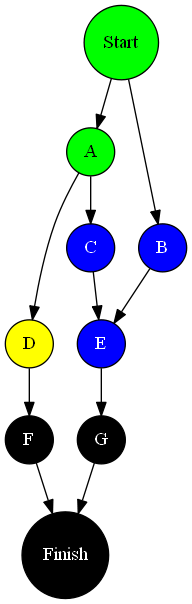

In [28]:
colors = {'Group 1':    {'fillcolor': 'blue',
                         'fontcolor': 'white'},
          'Group 2':    {'fillcolor': 'yellow',
                         'fontcolor': 'black'},
          'Group 1, 2': {'fillcolor': 'green',
                         'fontcolor': 'black'},
          'None':       {'fillcolor': 'black',
                         'fontcolor': 'white'}}

display_graph(H, colors=colors, index_col='Cluster')